In [1]:
import os, sys, time, copy, pickle as pkl
import numpy as np
import pandas as pd
import itertools
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import plotting_utils as utils

import importlib

%matplotlib inline 

# Per-task main tables

In [182]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

In [177]:
args = dict(
    init = "pretrained", state = "stateful", ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_fedsim = False, metric_name = "accuracy"
)

ds_and_model = ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"][2]
df, dfs = utils.get_main_pertask_table_mean_10p(ds_and_model, **args)
df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
df2 = utils.rename_multilevel_table(df2)

df2

Mean Accuracy \%                           \
                                   Finetune                   FedAlt   
Non-personalized             $23.82_{0.00}$           $23.82_{0.00}$   
Input Layer         $\mathbf{24.96}_{0.01}$           $24.48_{0.01}$   
Output Layer                 $24.93_{0.01}$  $\mathbf{25.04}_{0.01}$   
Adapter (dim=$16$)           $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   
Adapter (dim=$64$)           $24.74_{0.01}$  $\mathbf{24.85}_{0.01}$   

                                   10th Percentile Accuracy \%  \
                            FedSim                    Finetune   
Non-personalized    $23.82_{0.00}$              $20.17_{0.00}$   
Input Layer         $24.77_{0.02}$     $\mathbf{21.34}_{0.04}$   
Output Layer        $24.76_{0.01}$     $\mathbf{21.42}_{0.04}$   
Adapter (dim=$16$)  $24.34_{0.07}$              $21.16_{0.03}$   
Adapter (dim=$64$)  $24.39_{0.05}$     $\mathbf{21.19}_{0.07}$   

                                                             
                                     FedAlt          FedSim  
Non-personalized             $20.17_{0.00}$  $20.17_{0.00}$  
Input Layer                  $20.76_{0.03}$  $21.14_{0.03}$  
Output Layer                 $21.39_{0.06}$  $21.28_{0.09}$  
Adapter (dim=$16$)  $\mathbf{21.23}_{0.04}$  $20.81_{0.24}$  
Adapter (dim=$64$)           $21.16_{0.03}$  $20.93_{0.16}$

In [253]:
args = dict(
    init = "pretrained", ne_finetune=5, ne_pfl=5, 
    seeds=[1, 2, 3, 4, 5],  # TODO!
    use_unweighted_stats = False, finetune_fedsim = True, metric_name="accuracy"
)


for ds_and_model in ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"]:
    print(ds_and_model)
    df, dfs = utils.get_main_pertask_table_mean_states(ds_and_model, **args)
    df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
    df2 = utils.rename_multilevel_table(df2)
    df2.to_latex(f'tables/pfl-algo_{ds_and_model}.tex', escape=False, multicolumn_format='c',)

df2

emnist_resnetgn
gldv2b_resnetgn
so_mini


Stateful                           \
                                   Finetune                   FedAlt   
Input Layer         $\mathbf{24.96}_{0.01}$           $24.44_{0.01}$   
Output Layer                 $24.93_{0.01}$  $\mathbf{25.05}_{0.01}$   
Adapter (dim=$16$)           $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   
Adapter (dim=$64$)           $24.74_{0.01}$  $\mathbf{24.86}_{0.01}$   

                                                  Stateless  \
                            FedSim                 Finetune   
Input Layer         $24.81_{0.01}$  $\mathbf{24.96}_{0.01}$   
Output Layer        $25.02_{0.01}$           $24.93_{0.01}$   
Adapter (dim=$16$)  $24.74_{0.01}$  $\mathbf{24.71}_{0.00}$   
Adapter (dim=$64$)  $24.75_{0.01}$  $\mathbf{24.74}_{0.01}$   

                                                             
                                     FedAlt          FedSim  
Input Layer                  $24.84_{0.01}$  $24.89_{0.01}$  
Output Layer        $\mathbf{24.94}_{0.01}$  $24.94_{0.01}$  
Adapter (dim=$16$)           $24.69_{0.01}$  $24.71_{0.01}$  
Adapter (dim=$64$)           $24.71_{0.01}$  $24.73_{0.01}$

In [264]:
importlib.reload(utils)
for state in ['stateless', 'stateful']:
    df, dfs = utils.get_main_combinedtask_table_mean(state=state)
    df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
    df2 = utils.rename_multilevel_table(df2, rename_index=False)
    df2.to_latex(f'tables/pfl-{state}.tex', escape=False, multicolumn_format='c')
df2

StackOverflow                           \
                             Finetune                   FedAlt   
Input Layer   $\mathbf{24.96}_{0.01}$           $24.44_{0.01}$   
Output Layer           $24.93_{0.01}$  $\mathbf{25.05}_{0.01}$   
Adapter                $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   

                                       GLDv2                           \
                      FedSim        Finetune                   FedAlt   
Input Layer   $24.81_{0.01}$  $51.97_{0.02}$  $\mathbf{53.94}_{0.06}$   
Output Layer  $25.02_{0.01}$  $53.21_{0.01}$  $\mathbf{56.64}_{0.05}$   
Adapter       $24.74_{0.01}$  $63.86_{0.06}$  $\mathbf{66.41}_{0.05}$   

                              
                      FedSim  
Input Layer   $53.64_{0.08}$  
Output Layer  $56.24_{0.04}$  
Adapter       $66.35_{0.03}$

In [360]:
importlib.reload(utils)
for state in ['stateless', 'stateful']:
    df, dfs = utils.get_main_combinedtask_table_mean(state=state, use_emnist=True)
    df2 = utils.convert_to_string_and_bold_multiindexcol(df, dfs, do_bold=True)
    df2 = utils.rename_multilevel_table(df2, rename_index=False)
    df2.to_latex(f'tables/pfl-full-{state}.tex', escape=False, multicolumn_format='c')
df2

StackOverflow                           \
                             Finetune                   FedAlt   
Input Layer   $\mathbf{24.96}_{0.01}$           $24.44_{0.01}$   
Output Layer           $24.93_{0.01}$  $\mathbf{25.05}_{0.01}$   
Adapter                $24.71_{0.00}$  $\mathbf{24.82}_{0.01}$   

                                       GLDv2                           \
                      FedSim        Finetune                   FedAlt   
Input Layer   $24.81_{0.01}$  $51.97_{0.02}$  $\mathbf{53.94}_{0.06}$   
Output Layer  $25.02_{0.01}$  $53.21_{0.01}$  $\mathbf{56.64}_{0.05}$   
Adapter       $24.74_{0.01}$  $63.86_{0.06}$  $\mathbf{66.41}_{0.05}$   

                                      EMNIST                           \
                      FedSim        Finetune                   FedAlt   
Input Layer   $53.64_{0.08}$  $93.29_{0.00}$  $\mathbf{93.62}_{0.03}$   
Output Layer  $56.24_{0.04}$  $93.37_{0.01}$  $\mathbf{93.57}_{0.04}$   
Adapter       $66.35_{0.03}$  $93.66_{0.00}$  $\mathbf{94.13}_{0.03}$   

                              
                      FedSim  
Input Layer   $93.55_{0.05}$  
Output Layer  $93.55_{0.05}$  
Adapter       $94.07_{0.03}$

# Effect of final finetuning

In [7]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

In [254]:
args = dict(
    init="pretrained", state = "stateful", ne_pfl=5, seeds=[1, 2, 3, 4, 5], 
    use_unweighted_stats = False
)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]

df_lst = []
for ds_and_model in ds_model_list:
    df, dfs = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    for dfx in [df, dfs]:
        dfx.drop(index=["adapter_64"], errors='ignore', inplace=True)
        dfx.rename(index={'adapter_16': 'adapter'}, inplace=True)
        dfx.rename(index={i:utils.rename_one_item(i) for i in dfx.index}, inplace=True)
    df_lst.append((df, dfs))

index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
df_out_s = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i][0].at[row, c]  # mean
            df_out_s.at[row, (ds, c)] = df_lst[i][1].at[row, c]  # std

df_out = utils.convert_to_string_and_bold_multiindexcol(df_out, df_out_s, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
df_out.to_latex("tables/final_finetune_pretrained_stateful.tex", escape=False, multicolumn_format='c',)
df_out

StackOverflow                         GLDv2                 \
                      FedAlt         FedSim         FedAlt         FedSim   
Input Layer   $-0.06_{0.01}$  $0.04_{0.02}$  $0.12_{0.02}$  $0.17_{0.03}$   
Output Layer   $0.00_{0.01}$  $0.25_{0.02}$  $0.49_{0.02}$  $0.57_{0.03}$   
Adapter        $0.01_{0.01}$  $0.40_{0.08}$  $0.14_{0.02}$  $0.17_{0.01}$   

                     EMNIST                 
                     FedAlt         FedSim  
Input Layer   $0.12_{0.01}$  $0.12_{0.03}$  
Output Layer  $0.09_{0.01}$  $0.09_{0.03}$  
Adapter       $0.27_{0.02}$  $0.33_{0.03}$

In [303]:
args = dict(
    init="pretrained", state = "stateless", ne_pfl=5, 
    use_unweighted_stats = False
)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]

df_lst = []
for ds_and_model in ds_model_list:
    df, dfs = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    for dfx in [df, dfs]:
        dfx.drop(index=["adapter_64"], errors='ignore', inplace=True)
        dfx.rename(index={'adapter_16': 'adapter'}, inplace=True)
        dfx.rename(index={i:utils.rename_one_item(i) for i in dfx.index}, inplace=True)
    df_lst.append((df, dfs))

index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
df_out_s = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i][0].at[row, c]  # mean
            df_out_s.at[row, (ds, c)] = df_lst[i][1].at[row, c]  # std

df_out = utils.convert_to_string_and_bold_multiindexcol(df_out, df_out_s, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
df_out.to_latex("tables/final_finetune_pretrained_stateless.tex", escape=False, multicolumn_format='c',)
df_out


StackOverflow                          GLDv2                  \
                     FedAlt         FedSim          FedAlt          FedSim   
Input Layer   $0.86_{0.03}$  $1.00_{0.02}$   $0.44_{0.03}$   $0.42_{0.03}$   
Output Layer  $1.08_{0.03}$  $1.10_{0.02}$   $1.47_{0.04}$   $1.46_{0.05}$   
Adapter       $0.84_{0.04}$  $0.88_{0.02}$  $11.68_{0.20}$  $10.42_{0.09}$   

                     EMNIST                 
                     FedAlt         FedSim  
Input Layer   $0.11_{0.02}$  $0.10_{0.04}$  
Output Layer  $0.15_{0.02}$  $0.11_{0.02}$  
Adapter       $0.46_{0.02}$  $0.42_{0.04}$

# Personalization increase versus #Params

In [10]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

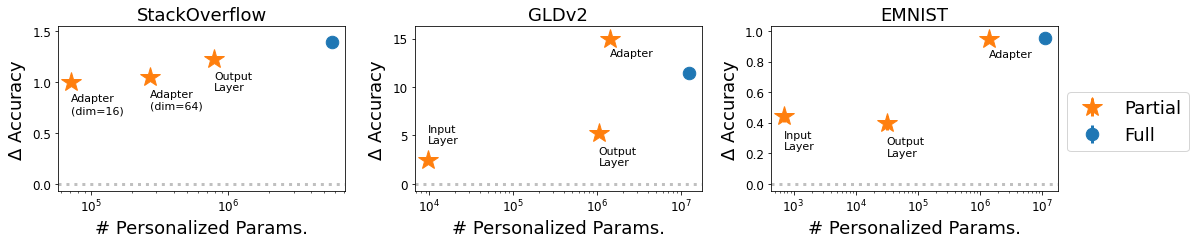

In [421]:
ds_and_model_lst = ['so_mini', 'gldv2b_resnetgn', 'emnist_resnetgn']

args = dict(
    init = "pretrained", state="stateful", ne_finetune=5, ne_pfl=5, 
    use_unweighted_stats = False, finetune_fedsim = True,
)

styles = [{'color': utils.COLORS[0], 'marker': 'o', 'markersize': 12.5, 'linestyle':"None"},
    {'color': utils.COLORS[1], 'marker': '*', 'markersize': 20.0, 'linestyle': 'None'},
    {'color': utils.COLORS[2], 'marker': 's', 'markersize': 10.0, 'linestyle': 'None'}
]

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
n_plots = len(ds_model_list)

rename_dict = {'tr_layer_3': 'Output\nLayer', 'adapter': 'Adapter', 
     'inp_layer': 'Input\nLayer', 'out_layer': 'Output\nLayer',
     'adapter_16': 'Adapter\n(dim=16)', 'adapter_64': 'Adapter\n(dim=64)'
    }

####### For full model personalization
seeds = [1, 2, 3, 4, 5]
ne_finetune = 5
ne_pfl = 5
pfl_algo = 'fedalt'
state = 'stateful'
init = 'pretrained'

df1, df1s =  utils.get_main_combined_table(
    ds_and_model_lst, pfl_algo, init, state, seeds, ne_finetune=ne_finetune, ne_pfl=ne_pfl,
    use_unweighted_stats=False, metric_name='accuracy'
)
######

###### For partial model personalization
df_lst = [utils.get_main_pertask_table_mean(ds_and_model, **args) for ds_and_model in ds_model_list]
num_params_all = utils.get_num_params()
######

##### Plot
f, ax = plt.subplots(1, n_plots, figsize=(5*n_plots, 3.5))
for i in range(n_plots):
    ds_and_model = ds_model_list[i]
    df, dfs = df_lst[i]
    pretrained_val = df.at["pretrained", df.columns.to_list()[0]]
    for dfx in [df, dfs]: dfx.drop(index=["pretrained", "tr_layer_0"], errors='ignore', inplace=True)
    num_params = pd.Series(num_params_all[ds_model_list[i]])
    x = num_params[df.index.to_numpy()]
    y = 100 * (df[pfl_algo] - pretrained_val)
    s = 100 * dfs[pfl_algo]
    keys = df[pfl_algo].keys()
    ax[i].errorbar(x, y, yerr=s,label=None if i>=1 else 'Partial', **styles[1])
    full_params = num_params['full']
    ax[i].errorbar(full_params, 
        100 * (df1.at[("Full Model", "pFedMe"), utils.dataset_rename_dict_short[ds_and_model]] - pretrained_val),
        yerr = 100 * df1s.at[("Full Model", "pFedMe"), utils.dataset_rename_dict_short[ds_and_model]],
        label=None if i>=1 else 'Full',
        **styles[0]
    )
    ax[i].set_xscale('log')
    ax[i].set_xlabel("# Personalized Params.")
    ax[i].set_ylabel(r"$\Delta$ Accuracy")
    ax[i].set_title(utils.dataset_rename_dict_short[ds_model_list[i]])
    ax[i].axhline(y=0, color='silver', linestyle='dotted')
    # add annotations
    ylim = ax[i].get_ylim(); xlim = ax[i].get_xlim()
    yrange = ylim[1] - ylim[0]
    for k in keys: 
        const = 0.11 if k == 'adapter' else 0.2
        if i==1 and k=='inp_layer': const = -0.1
        ax[i].text(x[k], y[k] - const * yrange, rename_dict[k], fontsize=11)

ylim = ax[0].get_ylim()
ax[0].set_ylim((ylim[0], ylim[1]*1.05))
ylim = ax[1].get_ylim()
ax[1].set_ylim((ylim[0], ylim[1]*1.03))
# lgd = f.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)
lgd = f.legend(loc="center left", bbox_to_anchor=(0.99, 0.5), ncol=1)

extra_artists = (lgd,)

plt.tight_layout()

# f.savefig('figures/partial_v_full.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)
f.savefig('figures/partial_v_full_annotated.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)


        

# Per-client statistics

In [222]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

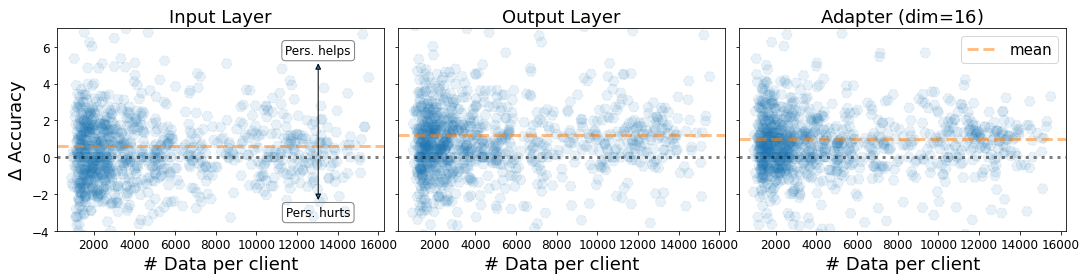

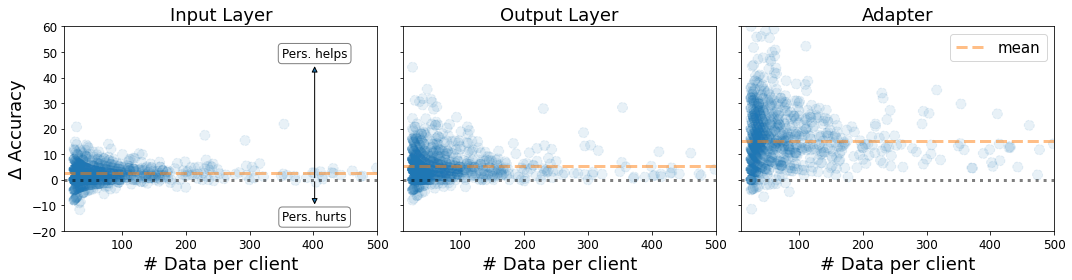

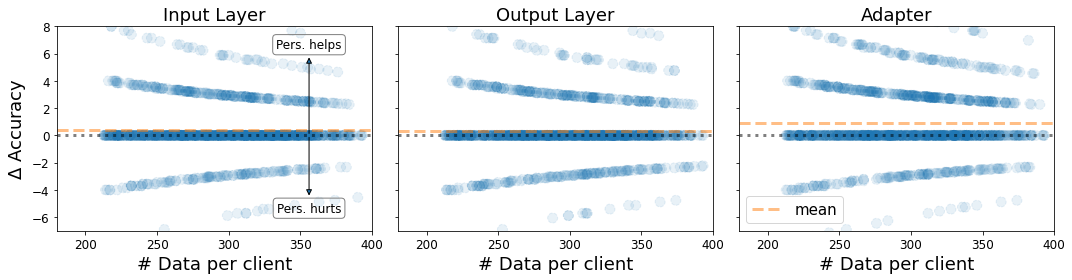

In [310]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    hist2d=False
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-20, 60),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}

for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot(ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/pfl_{ds_and_model}_scatter.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)
    


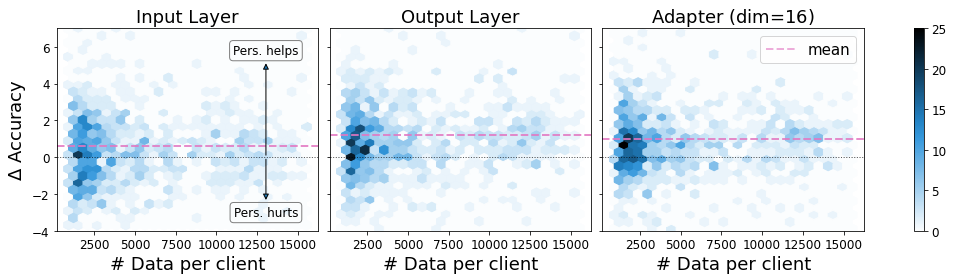

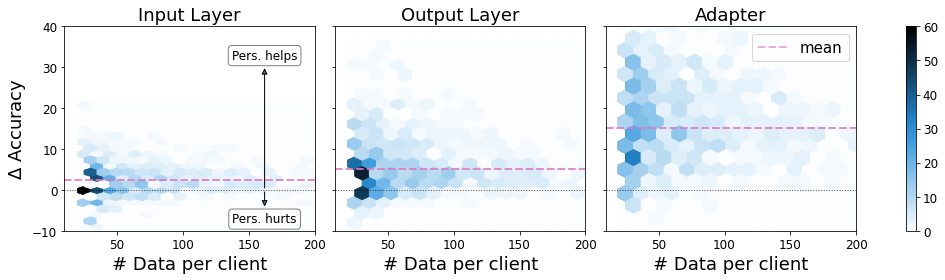

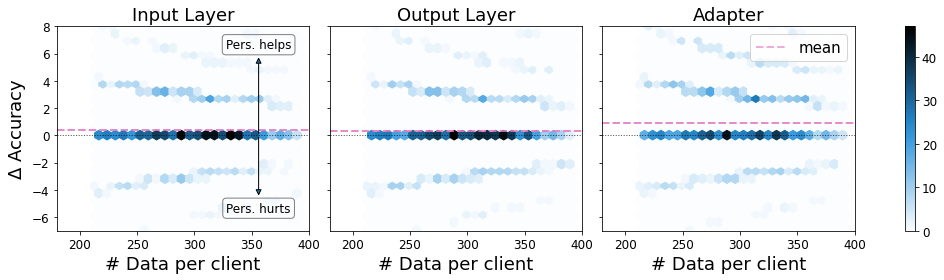

In [309]:
importlib.reload(utils)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    hist2d=True
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-10, 40),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 200),
    'emnist_resnetgn': (180, 400)
}
gridsize={ # list if one per plot, else scalar
    'so_mini': 25,
    'gldv2b_resnetgn': [18, 16, 15],
    'emnist_resnetgn': 25,
}

for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/pfl_{ds_and_model}_hist2d.pdf', bbox_extra_artists=extra_artists)


# Per-client full vs. partial

i = 0	mean=6.0084	gt0=1000	lt0=0	eq0=0
i = 1	mean=6.3097	gt0=1000	lt0=0	eq0=0
--------------------------------------------------
i = 0	mean=1.3821	gt0=704	lt0=244	eq0=52
i = 1	mean=1.2287	gt0=690	lt0=256	eq0=54
--------------------------------------------------
i = 0	mean=3.4780	gt0=583	lt0=7	eq0=233
i = 1	mean=3.8761	gt0=597	lt0=0	eq0=226
--------------------------------------------------
i = 0	mean=11.4211	gt0=757	lt0=13	eq0=53
i = 1	mean=14.9595	gt0=782	lt0=22	eq0=19
--------------------------------------------------
i = 0	mean=3.3352	gt0=1107	lt0=1	eq0=6
i = 1	mean=2.5237	gt0=1085	lt0=7	eq0=22
--------------------------------------------------
i = 0	mean=0.9466	gt0=364	lt0=138	eq0=612
i = 1	mean=0.9440	gt0=360	lt0=142	eq0=612
--------------------------------------------------


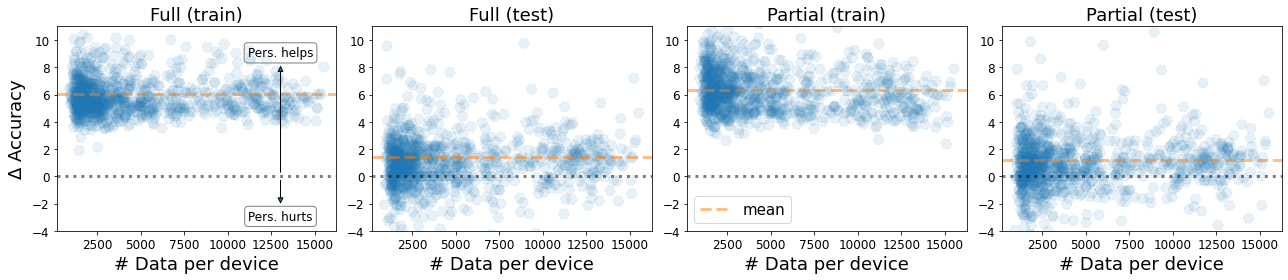

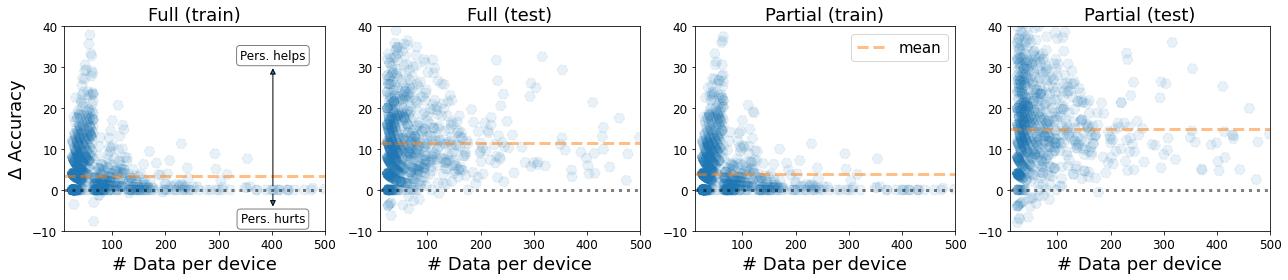

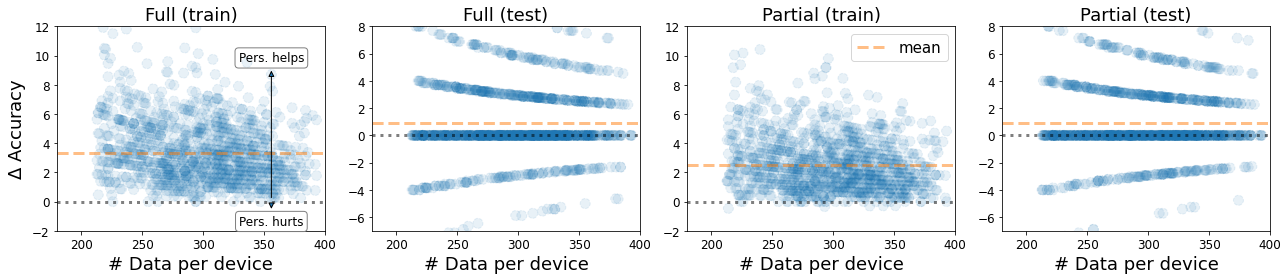

In [426]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    hist2d=False
)
ylims = {
    'so_mini': [(-4, 11), (-4, 11)],
    'gldv2b_resnetgn': [(-10, 40), (-10, 40)],
    'emnist_resnetgn': [(-2, 12), (-7, 8)]
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={ # list if one per plot, else scalar
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial_main(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/partial_v_full_{ds_and_model}_scatter_main.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)


i = 0	mean=1.3821	gt0=704	lt0=244	eq0=52
i = 1	mean=1.3780	gt0=699	lt0=245	eq0=56
i = 2	mean=1.3701	gt0=722	lt0=224	eq0=54
i = 3	mean=1.2287	gt0=690	lt0=256	eq0=54
--------------------------------------------------
i = 0	mean=11.4211	gt0=757	lt0=13	eq0=53
i = 1	mean=11.4101	gt0=757	lt0=13	eq0=53
i = 2	mean=11.4870	gt0=757	lt0=19	eq0=47
i = 3	mean=14.9595	gt0=782	lt0=22	eq0=19
--------------------------------------------------
i = 0	mean=0.9466	gt0=364	lt0=138	eq0=612
i = 1	mean=0.9545	gt0=362	lt0=132	eq0=620
i = 2	mean=0.9651	gt0=363	lt0=134	eq0=617
i = 3	mean=0.9440	gt0=360	lt0=142	eq0=612
--------------------------------------------------


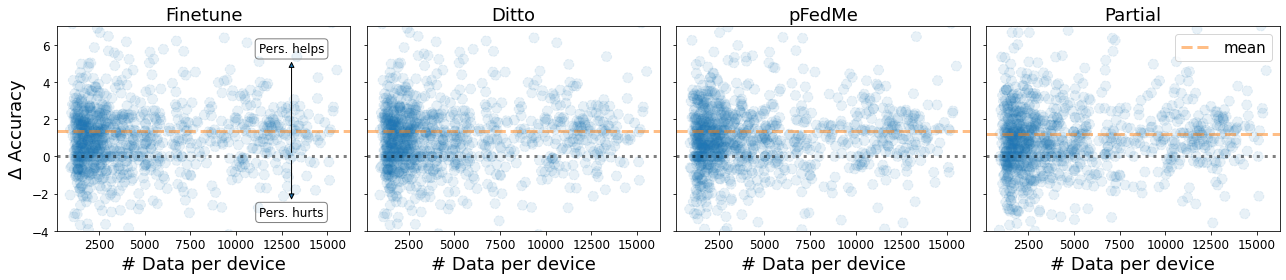

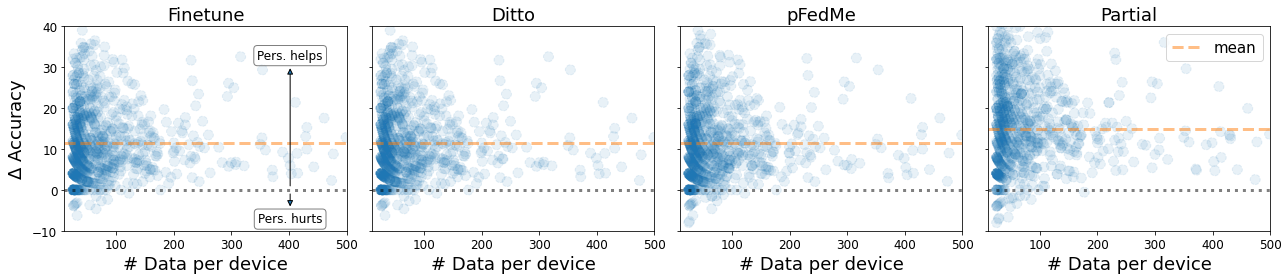

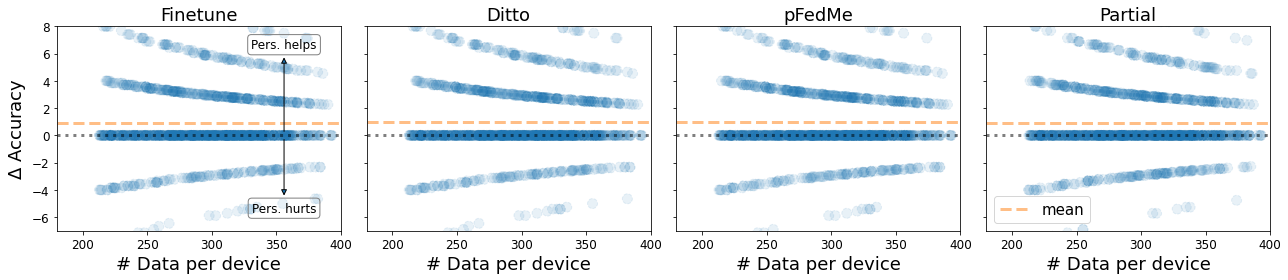

In [427]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
    hist2d=False
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-10, 40),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={ # list if one per plot, else scalar
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/partial_v_full_{ds_and_model}_scatter.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)


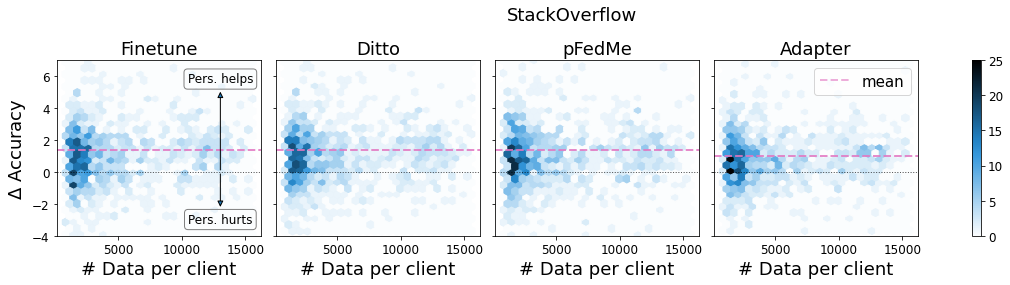

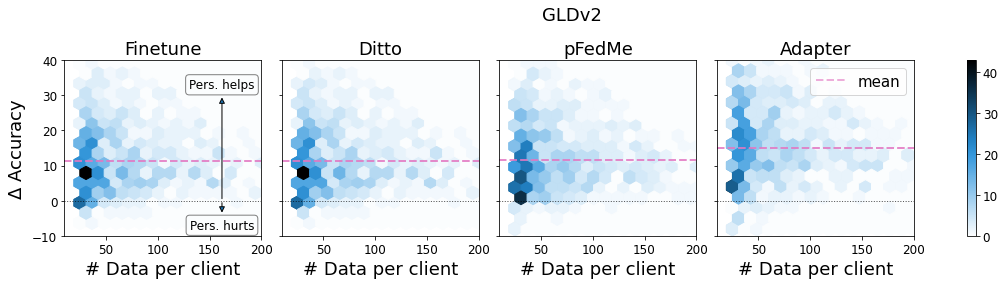

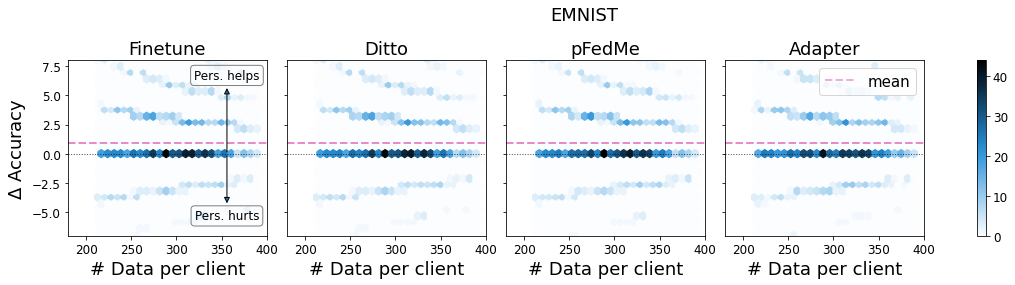

In [230]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
    hist2d=True
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-10, 40),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 200),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/partial_v_full_{ds_and_model}_hist2d.pdf', bbox_extra_artists=extra_artists)



## Train plots

i = 0	mean=6.0084	gt0=1000	lt0=0	eq0=0
i = 1	mean=6.0092	gt0=1000	lt0=0	eq0=0
i = 2	mean=5.9596	gt0=1000	lt0=0	eq0=0
i = 3	mean=6.3097	gt0=1000	lt0=0	eq0=0
--------------------------------------------------
i = 0	mean=3.4780	gt0=583	lt0=7	eq0=233
i = 1	mean=3.4780	gt0=583	lt0=7	eq0=233
i = 2	mean=3.4958	gt0=583	lt0=8	eq0=232
i = 3	mean=3.8761	gt0=597	lt0=0	eq0=226
--------------------------------------------------
i = 0	mean=3.3352	gt0=1107	lt0=1	eq0=6
i = 1	mean=3.2804	gt0=1105	lt0=1	eq0=8
i = 2	mean=3.2864	gt0=1105	lt0=1	eq0=8
i = 3	mean=2.5237	gt0=1085	lt0=7	eq0=22
--------------------------------------------------


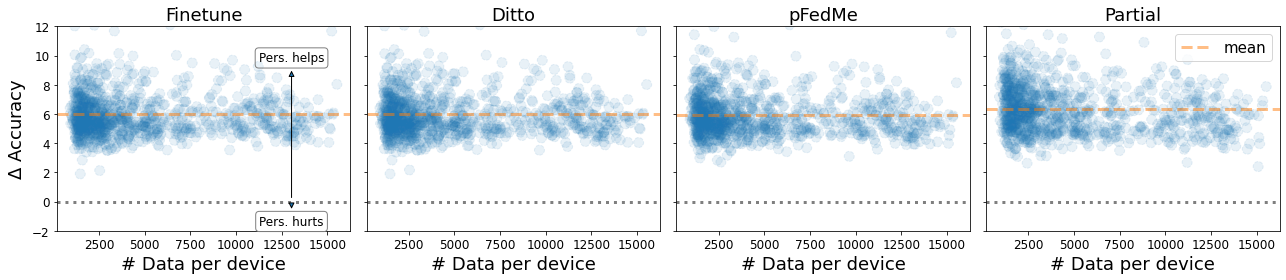

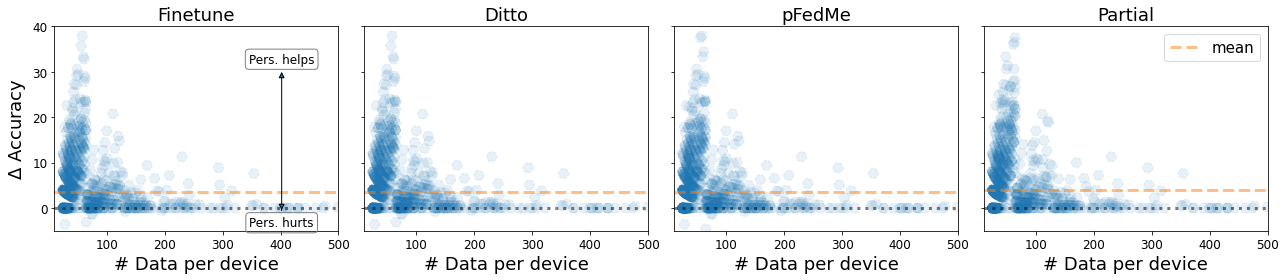

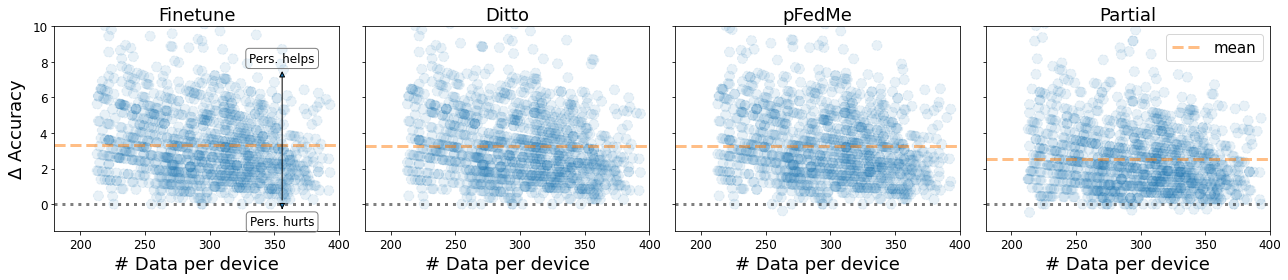

In [428]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'train',
    hist2d=False
)
ylims = {
    'so_mini': (-2, 12),
    'gldv2b_resnetgn': (-5, 40),
    'emnist_resnetgn': (-1.5, 10)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={ # list if one per plot, else scalar
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/partial_v_full_{ds_and_model}_tr_scatter.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)


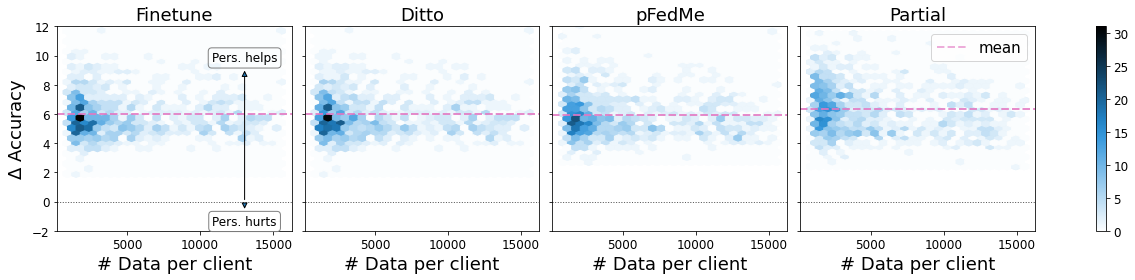

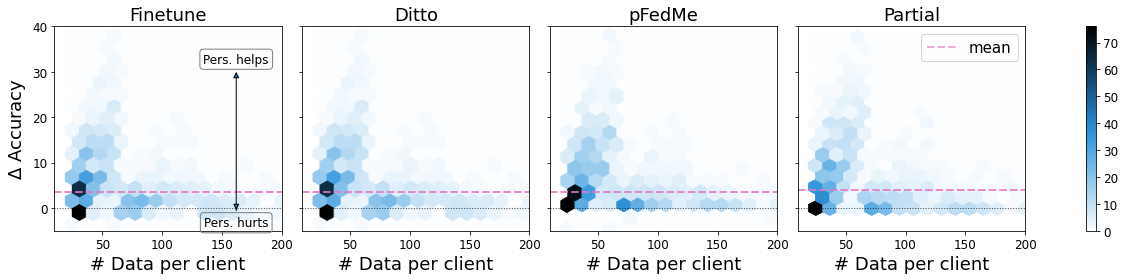

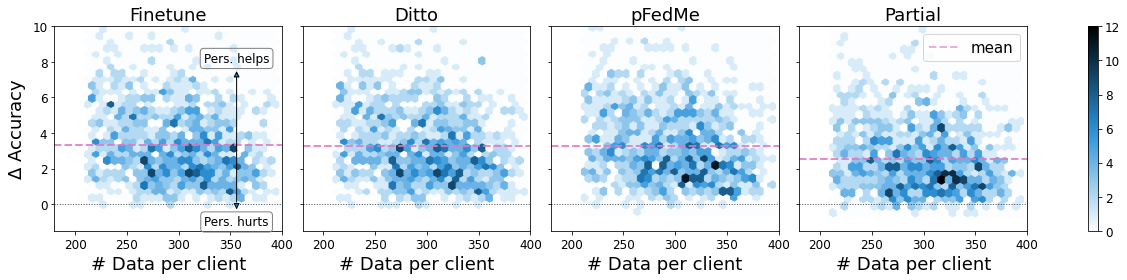

In [317]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'train',
    hist2d=True
)
ylims = {
    'so_mini': (-2, 12),
    'gldv2b_resnetgn': (-5, 40),
    'emnist_resnetgn': (-1.5, 10)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 200),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/partial_v_full_{ds_and_model}_tr_hist2d.pdf', bbox_extra_artists=extra_artists)



# Per-client regularization

i = 0	mean=1.0202	gt0=667	lt0=261	eq0=72
i = 1	mean=1.0040	gt0=664	lt0=267	eq0=69
i = 2	mean=0.1514	gt0=515	lt0=350	eq0=135
--------------------------------------------------
i = 0	mean=14.9595	gt0=782	lt0=22	eq0=19
i = 1	mean=14.8936	gt0=779	lt0=20	eq0=24
i = 2	mean=8.5116	gt0=719	lt0=48	eq0=56
--------------------------------------------------
i = 0	mean=0.9440	gt0=360	lt0=142	eq0=612
i = 1	mean=0.8858	gt0=351	lt0=138	eq0=625
i = 2	mean=0.1084	gt0=222	lt0=184	eq0=708
--------------------------------------------------


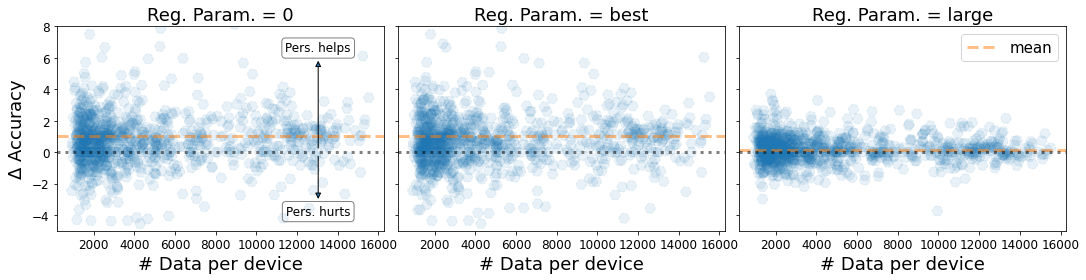

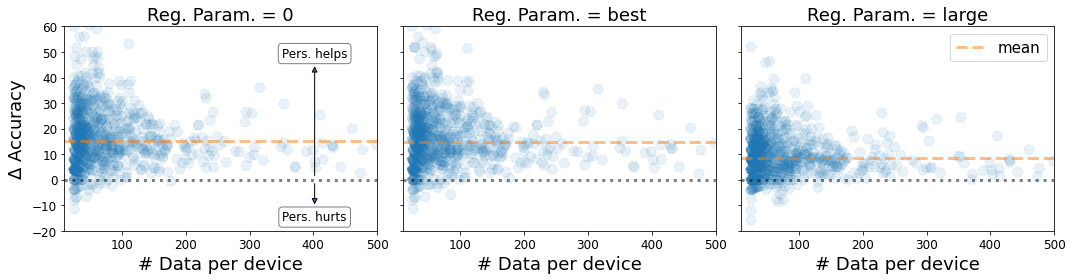

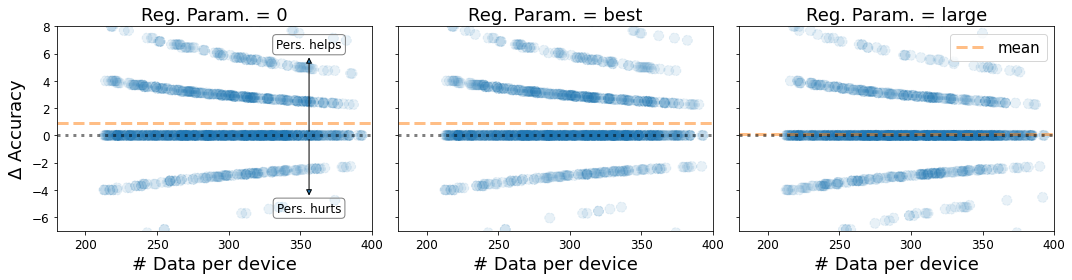

In [429]:
importlib.reload(utils)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
    hist2d=False
)
ylims = {
    'so_mini': (-5, 8),
    'gldv2b_resnetgn': (-20, 60),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}

for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_regularization(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/regularization_{ds_and_model}_scatter.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)





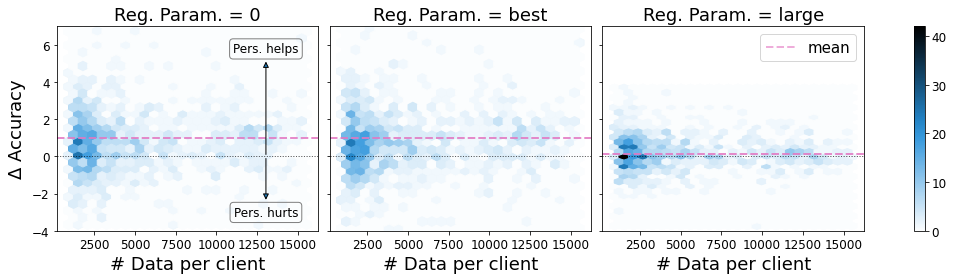

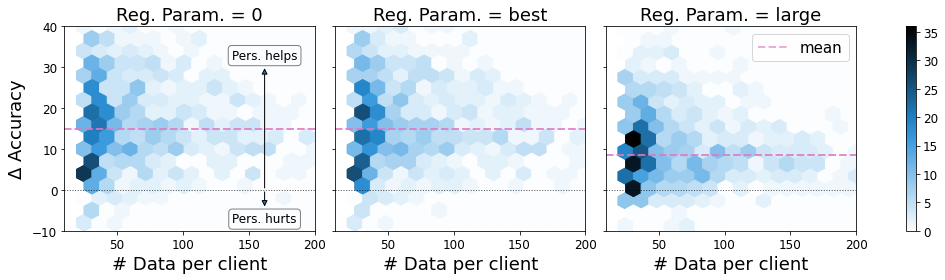

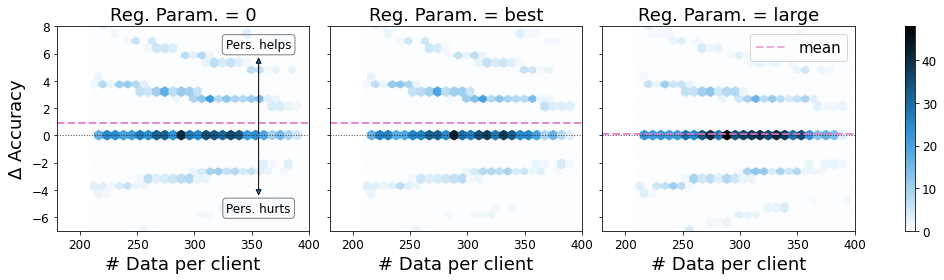

In [319]:
importlib.reload(utils)
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
    hist2d=True
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-10, 40),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 200),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_regularization(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/regularization_{ds_and_model}_hist2d.pdf', bbox_extra_artists=extra_artists)



# Per-client Dropout

i = 0	mean=1.2287	gt0=690	lt0=256	eq0=54
i = 1	mean=1.4077	gt0=750	lt0=193	eq0=57
i = 2	mean=0.2275	gt0=487	lt0=450	eq0=63
--------------------------------------------------


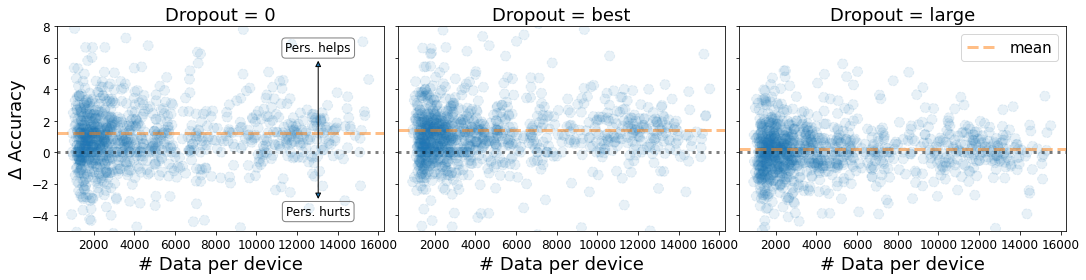

In [430]:
importlib.reload(utils)
ds_model_list = ["so_mini"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test'
)
ylims = {
    'so_mini': (-5, 8),
    'gldv2b_resnetgn': (-20, 60),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 500),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_dropout(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/dropout_{ds_and_model}_scatter.pdf', bbox_inches='tight', bbox_extra_artists=extra_artists)





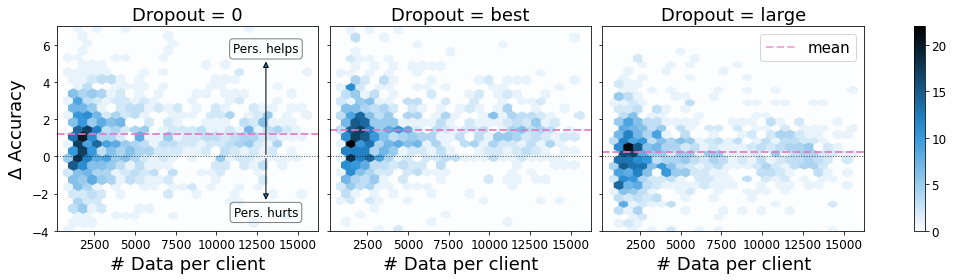

In [321]:
importlib.reload(utils)
ds_model_list = ["so_mini"]
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    x_train_or_test = 'train',
    train_or_test = 'test',
    hist2d=True
)
ylims = {
    'so_mini': (-4, 7),
    'gldv2b_resnetgn': (-10, 40),
    'emnist_resnetgn': (-7, 8)
}
xlims = {
    'so_mini': None,
    'gldv2b_resnetgn': (10, 200),
    'emnist_resnetgn': (180, 400)
}
gridsize={
    'so_mini': 25,
    'gldv2b_resnetgn': 15,
    'emnist_resnetgn': 25,
}


for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_dropout(
        ds_and_model, 
        xlim=xlims[ds_and_model], ylim=ylims[ds_and_model], gridsize=gridsize[ds_and_model],
        args=args, **kwargs
    )
    f.savefig(f'figures/per_client/regularization_{ds_and_model}_hist2d.pdf', bbox_extra_artists=extra_artists)



# Generalization: Scatter versus Non-Personalized Accuracy

In [163]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

/home/pillutla/fl/pfl/plotting/plotting_utils.py:778: UserWarning: FixedFormatter should only be used together with FixedLocator
  data = pd.DataFrame(data)
/home/pillutla/fl/pfl/plotting/plotting_utils.py:778: UserWarning: FixedFormatter should only be used together with FixedLocator
  data = pd.DataFrame(data)
/home/pillutla/fl/pfl/plotting/plotting_utils.py:778: UserWarning: FixedFormatter should only be used together with FixedLocator
  data = pd.DataFrame(data)


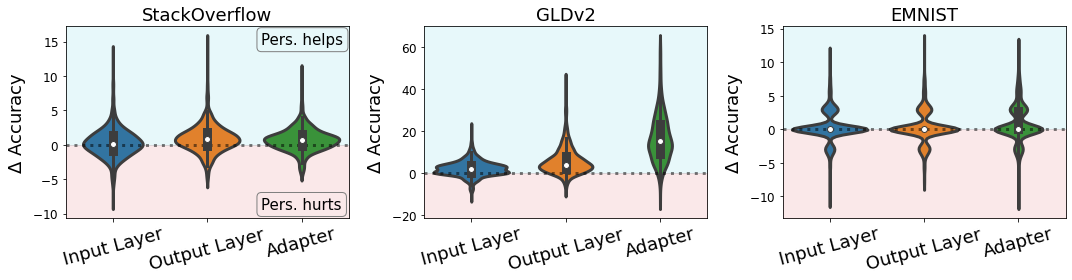

In [266]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]

f, ax = plt.subplots(1, 3, figsize=(15, 4))
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    boxplot=False,
    rotation=15
)

for i, ds_and_model in enumerate(ds_model_list):
    utils.per_user_stats_scatter_plot_3(ds_and_model, ax=ax[i], annotate=(i==0), args=args, **kwargs)
    
plt.tight_layout()

plt.savefig('figures/per_client/all_violin.pdf', bbox_inches='tight')


/home/pillutla/fl/pfl/plotting/plotting_utils.py:820: UserWarning: FixedFormatter should only be used together with FixedLocator
  name_lst = get_name_list(ds_and_model) # PFL names
/home/pillutla/fl/pfl/plotting/plotting_utils.py:820: UserWarning: FixedFormatter should only be used together with FixedLocator
  name_lst = get_name_list(ds_and_model) # PFL names
/home/pillutla/fl/pfl/plotting/plotting_utils.py:820: UserWarning: FixedFormatter should only be used together with FixedLocator
  name_lst = get_name_list(ds_and_model) # PFL names
/home/pillutla/fl/pfl/plotting/plotting_utils.py:820: UserWarning: FixedFormatter should only be used together with FixedLocator
  name_lst = get_name_list(ds_and_model) # PFL names


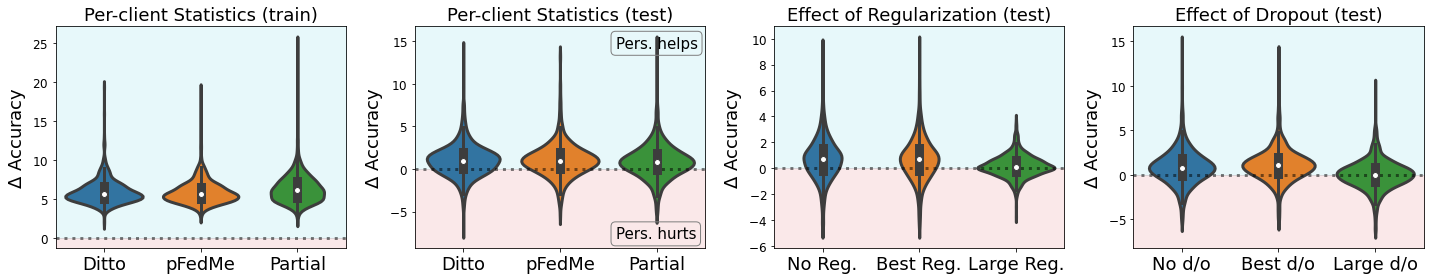

In [342]:
importlib.reload(utils)

ds_and_model = "so_mini"

f, ax = plt.subplots(1, 4, figsize=(20, 4))
args = dict(
    init = "pretrained", state="stateful", seed=2, num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    boxplot=False
)

utils.per_user_scatter_plot_3_full_v_partial(ds_and_model, ax=ax[0], train=True, annotate=False, args=args, **kwargs)
utils.per_user_scatter_plot_3_full_v_partial(ds_and_model, ax=ax[1], annotate=True, args=args, **kwargs)
utils.per_user_stats_scatter_plot_3_regularization(ds_and_model, ax=ax[2], annotate=False, args=args, **kwargs)
utils.per_user_stats_scatter_plot_3_dropout(ds_and_model, ax=ax[3], annotate=False, args=args, **kwargs)
    
plt.tight_layout()
plt.savefig('figures/violin_main.pdf', bbox_inches='tight')

In [149]:
print(ax[0].get_yticks())

[-0.1  -0.05  0.    0.05  0.1   0.15  0.2 ]


# Per-Seed Behavior

In [324]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

Test metrics


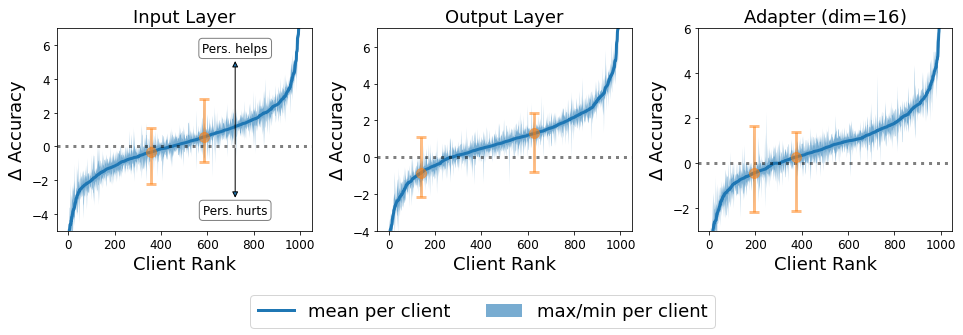

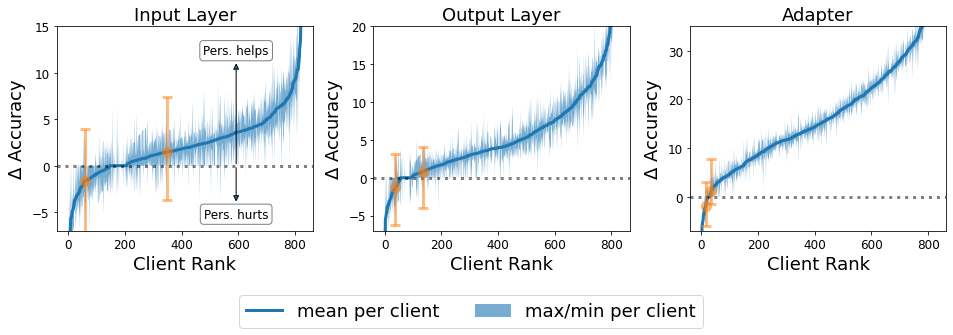

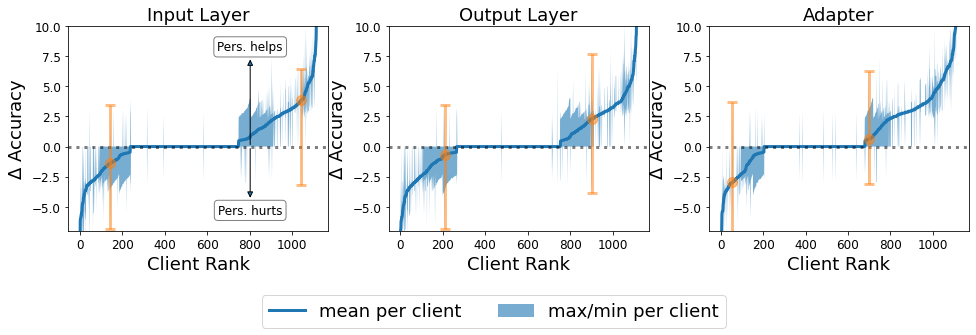

In [325]:
ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    annotate=True
)
ylims = {
    "so_mini": [(-5, 7), (-4, 7), (-3, 6)],
    "gldv2b_resnetgn": [(-7, 15), (-7, 20), (-7, 35)],
    "emnist_resnetgn": [(-7, 10), (-7, 10), (-7, 10)],
}

for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_4(ds_and_model, ylims=ylims[ds_and_model], args=args, **kwargs)
    f.savefig(f'figures/per_seed/pfl_{ds_and_model}.pdf', bbox_extra_artists=extra_artists)

print('Test metrics')

Test metrics


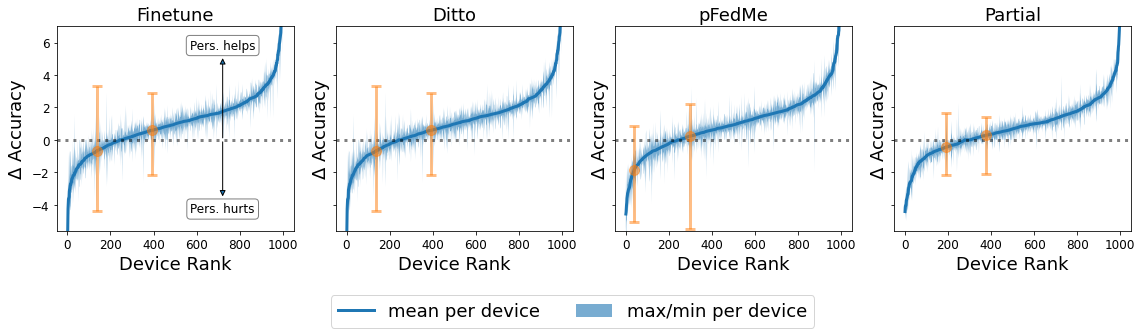

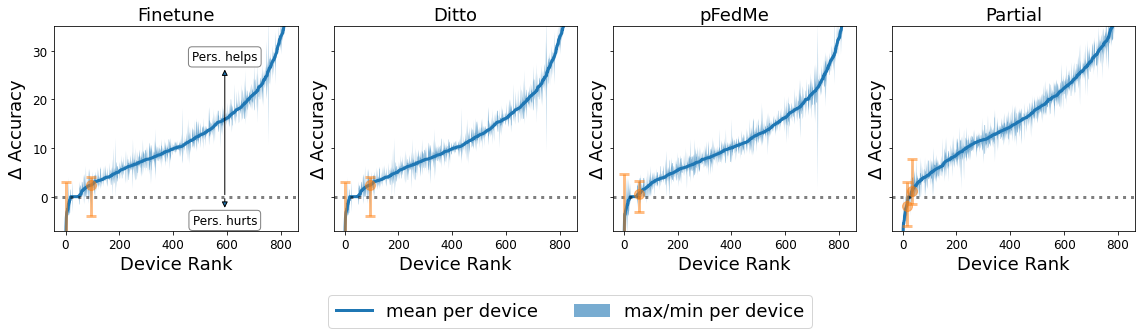

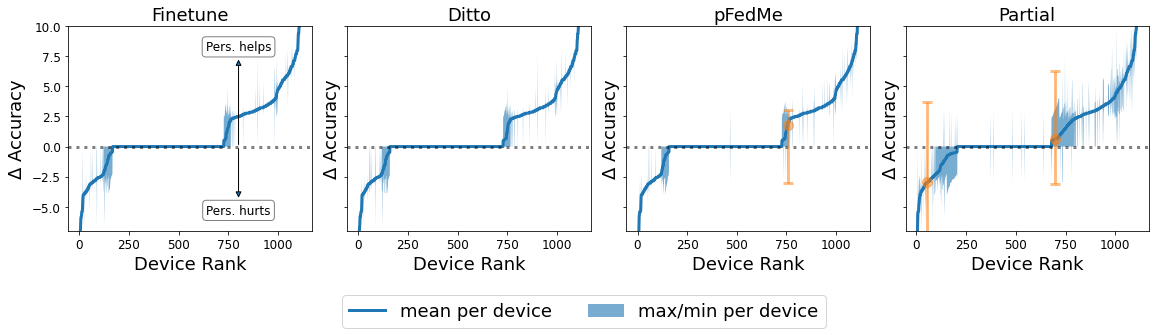

In [432]:
importlib.reload(utils)

ds_model_list = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    train=False,
    annotate=True
)

ylims = {
    "so_mini": (-5.6, 7),
    "gldv2b_resnetgn": (-7, 35),
    "emnist_resnetgn": (-7, 10)
}

for ds_and_model in ds_model_list:
    f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial_4(ds_and_model, ylim=ylims[ds_and_model], args=args, **kwargs)
    f.savefig(f'figures/per_seed/partial_v_full_{ds_and_model}.pdf', bbox_extra_artists=extra_artists)

print('Test metrics')

Test metrics


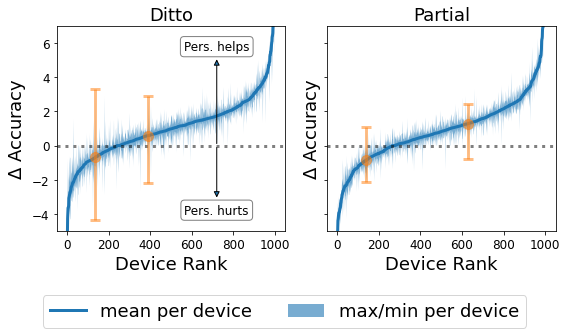

In [433]:
importlib.reload(utils)

ds_and_model = "so_mini"
args = dict(
    init = "pretrained", state="stateful", num_epochs_finetune=5,
)
kwargs = dict(
    pfl_algo = "fedalt",
    metric_name = 'accuracy',
    min_is_best = False,
    train=False
)


f, extra_artists = utils.per_user_stats_scatter_plot_full_v_partial_4_main(ds_and_model, ylim=(-5, 7), args=args, **kwargs)
f.savefig(f'figures/per_seed/partial_v_full_{ds_and_model}_main.pdf', bbox_extra_artists=extra_artists, bbox_inches='tight')

print('Test metrics')

# Main Table: Summary

In [247]:
importlib.reload(utils)

<module 'plotting_utils' from '/home/pillutla/fl/pfl/plotting/plotting_utils.py'>

In [250]:
ds_and_model_lst = ["so_mini", "gldv2b_resnetgn", "emnist_resnetgn"]
seeds = [1, 2, 3, 4, 5]
pfl_algo = 'fedalt'
state = 'stateful'
init = 'pretrained'

df, dfs = utils.get_main_combined_table(
    ds_and_model_lst, pfl_algo, init, state, seeds, ne_finetune=5, ne_pfl=5,
    use_unweighted_stats=False, metric_name='accuracy'
)

df2 = utils.convert_to_string_and_bold_maxpercol(df, dfs, do_bold=True, print_std=True).T

df2.to_latex('tables/main_std.tex', escape=False, multicolumn_format='c', column_format='llllllll')

df3 = utils.convert_to_string_and_bold_maxpercol(df, dfs, do_bold=True, print_std=False).T

df2.to_latex('tables/main_nostd.tex', escape=False, multicolumn_format='c', column_format='llllllll')

In [251]:
df2

Non-personalized      Full Model                  \
                                      Finetune           Ditto   
StackOverflow   $23.82_{0.00}$  $25.20_{0.01}$  $25.20_{0.01}$   
GLDv2           $51.43_{0.00}$  $62.85_{0.02}$  $62.85_{0.01}$   
EMNIST          $93.18_{0.00}$  $94.13_{0.01}$  $94.13_{0.01}$   

                                         $\partial$PFL                  \
                                pFedMe     Input Layer    Output Layer   
StackOverflow  $\mathbf{25.21}_{0.01}$  $24.44_{0.01}$  $25.05_{0.01}$   
GLDv2                   $62.92_{0.02}$  $53.94_{0.07}$  $56.64_{0.05}$   
EMNIST         $\mathbf{94.13}_{0.01}$  $93.62_{0.04}$  $93.57_{0.05}$   

                                        
                               Adapter  
StackOverflow           $24.82_{0.01}$  
GLDv2          $\mathbf{66.41}_{0.06}$  
EMNIST                  $94.13_{0.03}$

In [246]:
df3

Non-personalized      Full Model                  \
                                      Finetune           Ditto   
StackOverflow   $23.82_{0.00}$  $25.20_{0.01}$  $25.20_{0.01}$   
GLDv2           $51.43_{0.00}$  $62.85_{0.02}$  $62.85_{0.01}$   
EMNIST          $93.18_{0.00}$  $94.13_{0.01}$  $94.13_{0.01}$   

                                         $\partial$PFL                  \
                                pFedMe     Input Layer    Output Layer   
StackOverflow  $\mathbf{25.21}_{0.01}$  $24.44_{0.01}$  $25.05_{0.01}$   
GLDv2                   $62.92_{0.02}$  $53.94_{0.07}$  $56.64_{0.05}$   
EMNIST         $\mathbf{94.13}_{0.01}$  $93.62_{0.04}$  $93.57_{0.05}$   

                                        
                               Adapter  
StackOverflow           $24.82_{0.01}$  
GLDv2          $\mathbf{66.41}_{0.06}$  
EMNIST                  $94.13_{0.03}$

In [227]:
df2

StackOverflow  \
Non-personalized                        $23.82_{0.00}$   
Full Model       Finetune               $25.20_{0.01}$   
                 Ditto                  $25.20_{0.01}$   
                 pFedMe        $\mathbf{25.21}_{0.01}$   
PFL              Input Layer            $24.48_{0.02}$   
                 Output Layer           $25.04_{0.01}$   
                 Adapter                $24.82_{0.01}$   

                                                 GLDv2  \
Non-personalized                        $51.43_{0.00}$   
Full Model       Finetune               $62.85_{0.02}$   
                 Ditto                  $62.85_{0.01}$   
                 pFedMe                 $62.92_{0.02}$   
PFL              Input Layer            $53.84_{0.08}$   
                 Output Layer           $56.26_{0.06}$   
                 Adapter       $\mathbf{66.28}_{0.04}$   

                                                EMNIST  
Non-personalized                        $93.18_{0.00}$  
Full Model       Finetune               $94.13_{0.01}$  
                 Ditto                  $94.13_{0.01}$  
                 pFedMe        $\mathbf{94.13}_{0.01}$  
PFL              Input Layer            $93.52_{0.04}$  
                 Output Layer           $93.50_{0.05}$  
                 Adapter                $93.95_{0.02}$

# Per-user statistics

so_mini	 median: 3214.5	 max: 15520	 min: 920	 mean: 4963.832
gldv2b_resnetgn	 median: 53.0	 max: 1000	 min: 25	 mean: 88.49331713244229
emnist_resnetgn	 median: 300.0	 max: 418	 min: 213	 mean: 298.1301615798923


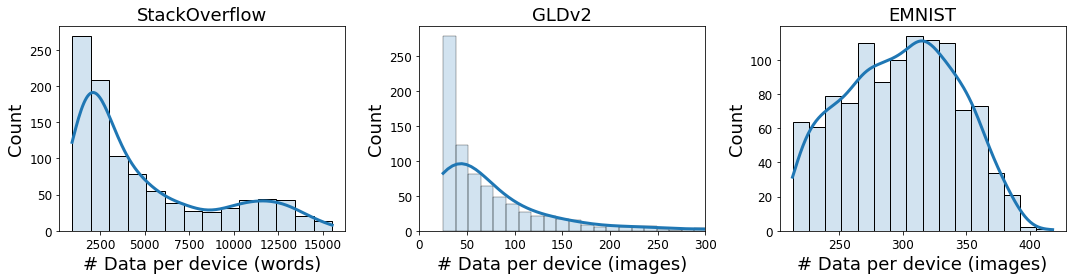

In [359]:
importlib.reload(utils)

f, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, ds_and_model in enumerate(['so_mini', 'gldv2b_resnetgn', 'emnist_resnetgn']):
    utils.per_user_sizes(ds_and_model, ax=ax[i])
    
ax[1].set_xlim(0, 300)
    
plt.tight_layout()

plt.savefig('figures/hist_ds_statistics.pdf', bbox_inches='tight')

# GLDv2

In [378]:
train_y, test_y, _ = utils.load_pkl('gld_unique_y.p')

In [379]:
y1 = np.asarray([y[0].shape[0] for y in train_y.values()])
y2 = np.asarray([y[0].shape[0] for y in test_y.values()])
for y in [y1, y2]:
    print(y.mean(), np.median(y), y.min(), y.max())

25.382746051032807 18.0 1 249
26.707168894289186 19.0 3 260


In [380]:
lst = []
for k in train_y.keys():
    y1 = train_y[k][0]
    y2 = test_y[k][0]
    n_int = len(set(y1).intersection(set(y2)))
    lst.append([y1.shape[0], y2.shape[0], n_int])
    
mat = np.asarray(lst)

In [381]:
n1 = mat[:, 0]
n2 = mat[:, 1]
n3 = mat[:, 2]  # intersection size
for y in [n1, n2, n3, n3/n1, n3/n1]:
    print(y.mean(), np.median(y), y.min(), y.max())

25.382746051032807 18.0 1 249
26.707168894289186 19.0 3 260
15.339003645200487 10.0 1 151
0.6490986387032346 0.6666666666666666 0.07142857142857142 1.0
0.6490986387032346 0.6666666666666666 0.07142857142857142 1.0


In [382]:
lst = []
for k in train_y.keys():
    y1 = dict(zip(*train_y[k]))
    y2 = dict(zip(*test_y[k]))
    common_keys = set(y1.keys()).intersection(set(y2.keys()))
    lst.append([sum(y1.values()), sum(y2.values()), sum([y1[i] for i in common_keys]), sum([y2[i] for i in common_keys])])
    
mat = np.asarray(lst)

In [387]:
n1 = mat[:, 1]
n2 = mat[:, 3]  # test and train both
n3 = n1 - n2  # test but not in train
for y in [n1, n2, n3, n2/n1, n3/n1]:
    print(y.mean(), np.median(y), y.min(), y.max())
    
print('-'*50)
print(n2.sum() / n1.sum(), n3.sum() / n1.sum())

88.49331713244229 53.0 25 1000
68.39732685297692 37.0 2 808
20.095990279465372 14.0 0 421
0.7156646355372135 0.7419354838709677 0.07407407407407407 1.0
0.28433536446278657 0.25806451612903225 0.0 0.9259259259259259
--------------------------------------------------
0.7729095153096252 0.22709048469037485
